# Spotify Top 50 (2020) Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv("spotifytoptracks.csv")

df.head(10)

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
5,5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap
6,6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
7,7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
8,8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative
9,9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.446,109.891,182161,Alternative/Indie


## Data Cleaning

Check for missing Values 


In [3]:
df.isnull().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

Remove duplicate samples


In [4]:
df.drop_duplicates(inplace=True)

Handling Outliers


In [5]:
# Selct only numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
print(outliers)

    Unnamed: 0  energy  danceability    key  loudness  acousticness  \
0        False   False         False  False     False         False   
1        False   False         False  False     False          True   
2        False   False         False  False     False         False   
3        False   False         False  False     False         False   
4        False   False         False  False     False         False   
5        False   False         False  False     False         False   
6        False   False         False  False     False         False   
7        False   False         False  False     False          True   
8        False   False         False  False     False         False   
9        False   False         False  False     False          True   
10       False   False         False  False     False         False   
11       False   False         False  False     False         False   
12       False   False         False  False     False         False   
13    

## Exploratory Data Analysis (EDA)

### General Information:

Number of observations 


In [6]:
print(f"The dataset has {df.shape[0]} rows")

The dataset has 50 rows


Number of features


In [7]:
print(f"The dataset has {df.shape[1]} columns")

The dataset has 17 columns


### Feature Classification:

In [8]:
# Categorical features
categorical_features = df.select_dtypes(include=["object"]).columns
print(f"Categorical features are: {list(categorical_features)}")

Categorical features are: ['artist', 'album', 'track_name', 'track_id', 'genre']


In [9]:
# Numeric features
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns
print(f"Numeric features are: {list(numeric_features)}")

Numeric features are: ['Unnamed: 0', 'energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### Questions:

#### 1. Artists with more than one popular track:

In [10]:
# Getting artists with more than one popular track
multiple_tracks = df["artist"].value_counts()[df["artist"].value_counts() > 1]

print("Artists with more than one popular track:\n")
for artist, count in multiple_tracks.items():
    print(f"{artist}: {count} tracks")

Artists with more than one popular track:

Billie Eilish: 3 tracks
Dua Lipa: 3 tracks
Travis Scott: 3 tracks
Justin Bieber: 2 tracks
Harry Styles: 2 tracks
Lewis Capaldi: 2 tracks
Post Malone: 2 tracks


In [11]:

print("Artists with more than one popular track:\n")
for artist, count in multiple_tracks.items():
    print(f"{artist}: {count} tracks")

Artists with more than one popular track:

Billie Eilish: 3 tracks
Dua Lipa: 3 tracks
Travis Scott: 3 tracks
Justin Bieber: 2 tracks
Harry Styles: 2 tracks
Lewis Capaldi: 2 tracks
Post Malone: 2 tracks


#### 2. Most Popular artist:

In [12]:
print(
    "The most popular artist in the Spotify Top 50 (2020) is",
    df["artist"].value_counts().idxmax(),
)

The most popular artist in the Spotify Top 50 (2020) is Billie Eilish


#### 3. Total number of artists:

In [13]:
print(
    f"There are {df['artist'].nunique()} unique artists in the Spotify Top 50 (2020)."
)

There are 40 unique artists in the Spotify Top 50 (2020).


#### 4. Albums with more than 1 popular track:

In [14]:
# Getting all Albums with multiple songs featured in top 50
multiple_track_album = df["album"].value_counts()[df["album"].value_counts() > 1]

print("Albums with multiple songs featured in top 50:\n")
for album, count in multiple_track_album.items():
    print(f"{album}: {count} tracks")

Albums with multiple songs featured in top 50:

Future Nostalgia: 3 tracks
Hollywood's Bleeding: 2 tracks
Fine Line: 2 tracks
Changes: 2 tracks


#### 5. Total Number of Albums:

In [15]:
print(f"There are {df['album'].nunique()} unique albums in the Spotify Top 50 (2020).")

There are 45 unique albums in the Spotify Top 50 (2020).


#### 6. Tracks with a danceability score above 0.7:

In [16]:
print("The most danceable tracks are:\n")
for track in df[df["danceability"] > 0.7][
    "track_name"
]:  # Filter tracks with danceability score above 0.7
    print(track)

The most danceable tracks are:

Dance Monkey
The Box
Roses - Imanbek Remix
Don't Start Now
ROCKSTAR (feat. Roddy Ricch)
death bed (coffee for your head)
Falling
Tusa
Blueberry Faygo
Intentions (feat. Quavo)
Toosie Slide
Say So
Memories
Life Is Good (feat. Drake)
Savage Love (Laxed - Siren Beat)
Breaking Me
everything i wanted
Señorita
bad guy
WAP (feat. Megan Thee Stallion)
Sunday Best
Godzilla (feat. Juice WRLD)
Break My Heart
Dynamite
Supalonely (feat. Gus Dapperton)
Sunflower - Spider-Man: Into the Spider-Verse
Hawái
Ride It
goosebumps
RITMO (Bad Boys For Life)
THE SCOTTS
SICKO MODE


#### 7. Tracks with a danceability score below 0.4:

In [17]:
print("The least danceable track(s):\n")
for track in df[df["danceability"] < 0.4][
    "track_name"
]:  # Filter tracks with danceability score below 0.4
    print(track)

The least danceable track(s):

lovely (with Khalid)


#### 8. Tracks with loudness above -5:

In [18]:
print("The loudest tracks are:\n")
for track in df[df["loudness"] > -5][
    "track_name"
]:  # Filter tracks with loudness above -5
    print(track)

The loudest tracks are:

Don't Start Now
Watermelon Sugar
Tusa
Circles
Before You Go
Say So
Adore You
Mood (feat. iann dior)
Break My Heart
Dynamite
Supalonely (feat. Gus Dapperton)
Rain On Me (with Ariana Grande)
Sunflower - Spider-Man: Into the Spider-Verse
Hawái
Ride It
goosebumps
Safaera
Physical
SICKO MODE


#### 9. Tracks with Loudness below -8:

In [19]:
print("The Quietest tracks are :\n")
for track in df[df["loudness"] < -8][
    "track_name"
]:  # Filter tracks with loudness below -8
    print(track)

The Quietest tracks are :

death bed (coffee for your head)
Falling
Toosie Slide
Savage Love (Laxed - Siren Beat)
everything i wanted
bad guy
HIGHEST IN THE ROOM
lovely (with Khalid)
If the World Was Ending - feat. Julia Michaels


#### 10. Longest and Shortest track:

In [20]:
def get_track_info(df, track_duration_col, track_name_col, artist_col, agg_func):
    """Function for reusable variables"""
    track_idx = agg_func(
        df[track_duration_col]
    )  # Get index of the longest/shortest track
    track_name = df.loc[track_idx, track_name_col]
    track_artist = df.loc[track_idx, artist_col]
    track_time = round(
        df.loc[track_idx, track_duration_col] / 60000, 2
    )  # Convert to minutes and round
    return track_name, track_artist, track_time


# Longest Track
longest_track, longest_track_artist, longest_track_time = get_track_info(
    df, "duration_ms", "track_name", "artist", pd.Series.idxmax
)
print(
    f"The longest track is '{longest_track}' by {longest_track_artist}, which is {longest_track_time} minutes long"
)

# Shortest Track
shortest_track, shortest_track_artist, shortest_track_time = get_track_info(
    df, "duration_ms", "track_name", "artist", pd.Series.idxmin
)
print(
    f"The shortest track is '{shortest_track}' by {shortest_track_artist}, which is {shortest_track_time} minutes long"
)

The longest track is 'SICKO MODE' by Travis Scott, which is 5.21 minutes long
The shortest track is 'Mood (feat. iann dior)' by 24kGoldn, which is 2.34 minutes long


#### Most Popular Genres and genres with only one song:

In [21]:
# Most Popular Genres:
genre_counts = (
    df["genre"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Genre", "genre": "Count"})
)

# Set the index to start from 1 instead of the default 0
genre_counts.index = genre_counts.index + 1

print("The Most Popular Genres are:\n")
print(genre_counts)


# Genres with only one song:
single_track_genres = (
    df["genre"]
    .value_counts()[df["genre"].value_counts() == 1]
    .reset_index()
    .rename(columns={"index": "Genre", "genre": "Count"})
)

# Set the index to start from 1 instead of the default 0
single_track_genres.index = single_track_genres.index + 1

print("\nThe Genres with only one song are:\n")
print(single_track_genres)

The Most Popular Genres are:

                                 Count  count
1                                  Pop     14
2                          Hip-Hop/Rap     13
3                     Dance/Electronic      5
4                    Alternative/Indie      4
5                             R&B/Soul      2
6                          Electro-pop      2
7                             Nu-disco      1
8              R&B/Hip-Hop alternative      1
9                        Pop/Soft Rock      1
10                             Pop rap      1
11                        Hip-Hop/Trap      1
12                     Dance-pop/Disco      1
13                           Disco-pop      1
14                Dreampop/Hip-Hop/R&B      1
15  Alternative/reggaeton/experimental      1
16                         Chamber pop      1

The Genres with only one song are:

                                 Count  count
1                             Nu-disco      1
2              R&B/Hip-Hop alternative      1
3            

### Correlations:

#### 1. Strong positive/negative correlations:

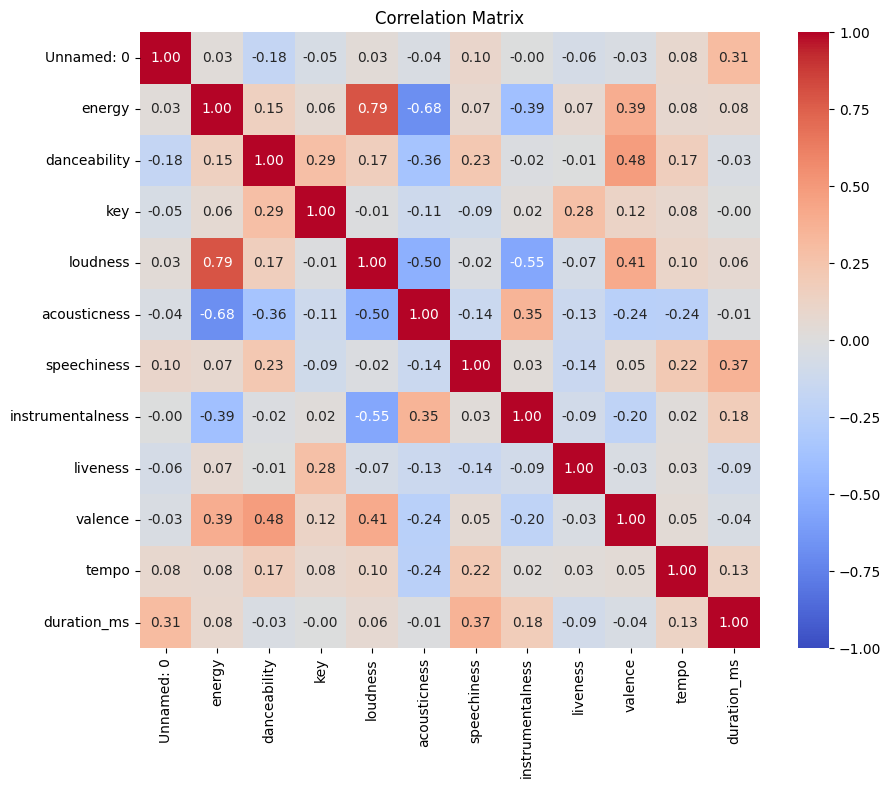

In [22]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=["int", "float"]).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

##### Key Insights:

##### Energy & Loudness:
    - High positive correlation (0.79), meaning energetic songs can be loud.

##### Energy & Acousticness:
    - Strong negative correlation (-0.68), meaning energetic songs might not be acoustic.

##### Danceability & Valence:
    - Positive correlation (0.48), meaning more danceable songs are usually happier.


#### 2. Comparison of genres across specific features:

In [23]:
# Filtering specific genres
selected_genres = df[
    df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])
]

# Group by genre and calculate the mean of selected features
genre_comp = selected_genres.groupby("genre")[
    ["danceability", "loudness", "acousticness"]
].describe()

print(genre_comp)

                  danceability                                             \
                         count      mean       std    min      25%    50%   
genre                                                                       
Alternative/Indie          4.0  0.661750  0.211107  0.459  0.49050  0.663   
Dance/Electronic           5.0  0.755000  0.094744  0.647  0.67400  0.785   
Hip-Hop/Rap               13.0  0.765538  0.085470  0.598  0.72600  0.774   
Pop                       14.0  0.677571  0.109853  0.464  0.61575  0.690   

                                  loudness            ...                  \
                       75%    max    count      mean  ...      75%    max   
genre                                                 ...                   
Alternative/Indie  0.83425  0.862      4.0 -5.421000  ... -4.83000 -4.746   
Dance/Electronic   0.78900  0.880      5.0 -5.338000  ... -4.25800 -3.756   
Hip-Hop/Rap        0.83000  0.896     13.0 -6.917846  ... -5.61600 -3.370  

##### Comparative Analysis of Genres Based on Danceability, Loudness, and Acousticness:

##### Danceability: 
    - Hip-Hop/Rap (0.766) and Dance/Electronic (0.755) are the most danceable genres, making them ideal for tracks that get people moving. 
    -Pop (0.678) and Alternative/Indie (0.662) are moderately danceable, indicating a more balanced feel.

##### Loudness:
    - Dance/Electronic is the loudest (-5.34 dB), followed closely by Alternative/Indie (-5.42 dB). 
    - Hip-Hop/Rap (-6.92 dB) and Pop (-6.46 dB) are quieter, suggesting a softer production style compared to the more aggressive sounds of Dance/Electronic.

##### Acousticness:
    - Alternative/Indie (0.583) has the most acoustic elements, reflecting its organic sound, while Dance/Electronic (0.099) has the least, focusing on electronic production. Pop (0.324) and Hip-Hop/Rap (0.189) fall in the middle, blending acoustic and electronic elements.

##### In summary, Dance/Electronic and Hip-Hop/Rap excel in danceability, with Dance/Electronic being louder but less acoustic. Alternative/Indie is more acoustic, offering a more organic sound, while Pop sits between these genres in both attributes.